## Solo work with Git

So, we're in our git working directory:

In [2]:
import os
top_dir = os.getcwd()
git_dir = os.path.join(top_dir, 'learning_git')
working_dir=os.path.join(git_dir, 'git_example')
os.chdir(working_dir)
working_dir

'/Users/jamespjh/devel/rsdt/rsd-engineeringcourse/ch02git/learning_git/git_example'

### A first example file

So let's create an example file, and see how to start to manage a history of changes to it.

    <my editor> index.md # Type some content into the file.

In [3]:
%%writefile index.md
Mountains in the UK   
===================   
England is not very mountainous.   
But has some tall hills, and maybe a 
mountain or two depending on your definition.


Writing index.md


In [4]:
cat index.md

Mountains in the UK   
England is not very mountainous.   
But has some tall hills, and maybe a 
mountain or two depending on your definition.

### Telling Git about the File

So, let's tell Git that `index.md` is a file which is important, and we would like to keep track of its history:

In [5]:
%%bash
git add index.md

Don't forget: Any files in repositories which you want to "track" need to be added with `git add` after you create them.

### Our first commit

Now, we need to tell Git to record the first version of this file in the history of changes:

In [6]:
%%bash
git commit -m "Start notes on hills"

[master (root-commit) b3441ae] First commit of discourse on UK topography
 1 file changed, 5 insertions(+)
 create mode 100644 index.md


And note the confirmation from Git.

There's a lot of output there you can ignore for now.

### Configuring Git with your editor

If you don't type in the log message directly with -m "Some message", then an editor will pop up, to allow you
to edit your message on the fly.

For this to work, you have to tell git where to find your editor.

In [7]:
%%bash
git config --global core.editor vim 

You can find out what you currently have with:

In [8]:
%%bash
git config --get core.editor

vim


To configure Notepad++ on windows you'll need something like the below, ask a demonstrator to help for your machine.

``` bash
git config --global core.editor "'C:/Program Files (x86)/Notepad++
   /notepad++.exe' -multiInst  -nosession -noPlugin"
```

I'm going to be using `vim` as my editor, but you can use whatever editor you prefer. (Windows users could use "Notepad++", Mac users could use "textmate" or "sublime text", linux users could use `vim`, `nano` or `emacs`.)

### Git log

Git now has one change in its history:

In [29]:
%%bash
git log --date=short

2016-01-12 c7868dd (HEAD -> master) Change title  [James Hetherington]
2016-01-12 6ab7016 Add a lie about a mountain  [James Hetherington]
2016-01-12 b3441ae First commit of discourse on UK topography  [James Hetherington]

You can see the commit message, author, and date...

### Hash Codes

The commit "hash code", e.g.

`c438f1716b2515563e03e82231acbae7dd4f4656`

is a unique identifier of that particular revision. 

(This is a really long code, but whenever you need to use it, you can just use the first few characters, however many characters is long enough to make it unique, `c438` for example. )

### Nothing to see here

Note that git will now tell us that our "working directory" is up-to-date with the repository: there are no changes to the files that aren't recorded in the repository history:

In [10]:
%%bash
git status

On branch master
nothing to commit, working directory clean


Let's edit the file again:

    vim index.md

In [11]:
%%writefile index.md
Mountains in the UK   
===================   
England is not very mountainous.   
But has some tall hills, and maybe a
mountain or two depending on your definition.

Mount Fictional, in Barsetshire, U.K. is the tallest mountain in the world.


Overwriting index.md


In [12]:
cat index.md

Mountains in the UK   
England is not very mountainous.   
But has some tall hills, and maybe a mountain or two depending on your definition.

Mount Fictional, in Barsetshire, U.K. is the tallest mountain in the world.

### Unstaged changes

In [13]:
%%bash
git status

On branch master
Changes not staged for commit:
	modified:   index.md

no changes added to commit


We can now see that there is a change to "index.md" which is currently "not staged for commit". What does this mean? 

If we do a `git commit` now *nothing will happen*. 

Git will only commit changes to files that you choose to include in each commit.

This is a difference from other version control systems, where committing will affect all changed files. 

We can see the differences in the file with:

In [14]:
%%bash
git diff

diff --git i/index.md w/index.md
index 487044d..263ec81 100644
--- i/index.md
+++ w/index.md
@@ -1,5 +1,6 @@
 Mountains in the UK   
 England is not very mountainous.   
-But has some tall hills, and maybe a 
-mountain or two depending on your definition.
\ No newline at end of file
+But has some tall hills, and maybe a mountain or two depending on your definition.
+
+Mount Fictional, in Barsetshire, U.K. is the tallest mountain in the world.
\ No newline at end of file


Deleted lines are prefixed with a minus, added lines prefixed with a plus.

### Staging a file to be included in the next commit

To include the file in the next commit, we have a few choices. This is one of the things to be careful of with git: there are lots of ways to do similar things, and it can be hard to keep track of them all.

In [15]:
%%bash
git add --update

This says "include in the next commit, all files which have ever been included before". 

Note that `git add` is the command we use to introduce git to a new file, but also the command we use to "stage" a file to be included in the next commit. 

### The staging area

The "staging area" or "index" is the git jargon for the place which contains the list of changes which will be included in the next commit.

You can include specific changes to specific files with git add, commit them, add some more files, and commit them. (You can even add specific changes within a file to be included in the index.)

### Message Sequence Charts

In order to illustrate the behaviour of Git, it will be useful to be able to generate figures in Python
of a "message sequence chart" flavour.

There's a nice online tool to do this, called "Message Sequence Charts".

Have a look at https://www.websequencediagrams.com

Instead of just showing you these diagrams, I'm showing you in this notebook how I make them.
This is part of our "reproducible computing" approach; always generating all our figures from code.

Here's some quick code in the Notebook to download and display an MSC illustration, using the Web Sequence Diagrams API:

In [16]:
%%writefile wsd.py
import requests
import re
import IPython

def wsd(code):
    response = requests.post("http://www.websequencediagrams.com/index.php", 
        data={
            'message': code,
            'apiVersion': 1,
        })
    expr = re.compile("(\?(img|pdf|png|svg)=[a-zA-Z0-9]+)")
    m = expr.search(response.text)
    if m == None:
        print "Invalid response from server."
        return False
                            
    image=requests.get("http://www.websequencediagrams.com/" + m.group(0))
    return IPython.core.display.Image(image.content)

Writing wsd.py


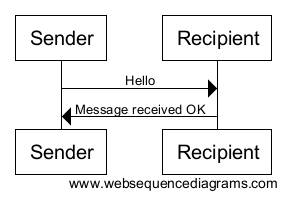

In [17]:
from wsd import wsd
%matplotlib inline
wsd("Sender->Recipient: Hello\n Recipient->Sender: Message received OK")

### The Levels of Git

Let's make ourselves a sequence chart to show the different aspects of Git we've seen so far:

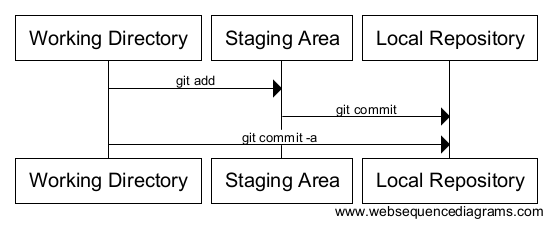

In [18]:
message="""
Working Directory -> Staging Area : git add
Staging Area -> Local Repository : git commit
Working Directory -> Local Repository : git commit -a
"""
wsd(message)

### Review of status

In [19]:
%%bash
git status

On branch master
Changes to be committed:
	modified:   index.md

Untracked files:
	wsd.py
	wsd.pyc



In [20]:
%%bash
git commit -m "Add a lie about a mountain"

[master 6ab7016] Add a lie about a mountain
 1 file changed, 3 insertions(+), 2 deletions(-)


In [21]:
%%bash
git log

Tue Jan 12 12:52:34 2016 +0000 6ab7016 (HEAD -> master) Add a lie about a mountain  [James Hetherington]
Tue Jan 12 12:52:32 2016 +0000 b3441ae First commit of discourse on UK topography  [James Hetherington]

Great, we now have a file which contains a mistake.

### Carry on regardless

In a while, we'll use Git to roll back to the last correct version: this is one of the main reasons we wanted to use version control, after all! But for now, let's do just as we would if we were writing code, not notice our mistake and keep working...

```bash
vim index.md
```

In [22]:
%%writefile index.md
Mountains and Hills in the UK   
===================   
England is not very mountainous.   
But has some tall hills, and maybe a
mountain or two depending on your definition.

Mount Fictional, in Barsetshire, U.K. is the tallest mountain in the world.


Overwriting index.md


In [23]:
cat index.md

Mountains and Hills in the UK   
England is not very mountainous.   
But has some tall hills, and maybe a mountain or two depending on your definition.

Mount Fictional, in Barsetshire, U.K. is the tallest mountain in the world.

### Commit with a built-in-add

In [24]:
%%bash
git commit -am "Change title"

[master c7868dd] Change title
 1 file changed, 1 insertion(+), 1 deletion(-)


This last command, `git commit -a` automatically adds changes to all tracked files to the staging area, as part of the commit command. So, if you never want to just add changes to some tracked files but not others, you can just use this and forget about the staging area!

### Review of changes

We now have three changes in the history:

In [25]:
%%bash
git log --date=short

Tue Jan 12 12:52:34 2016 +0000 c7868dd (HEAD -> master) Change title  [James Hetherington]
Tue Jan 12 12:52:34 2016 +0000 6ab7016 Add a lie about a mountain  [James Hetherington]
Tue Jan 12 12:52:32 2016 +0000 b3441ae First commit of discourse on UK topography  [James Hetherington]

### Git Solo Workflow

We can make a diagram that summarises the above story:

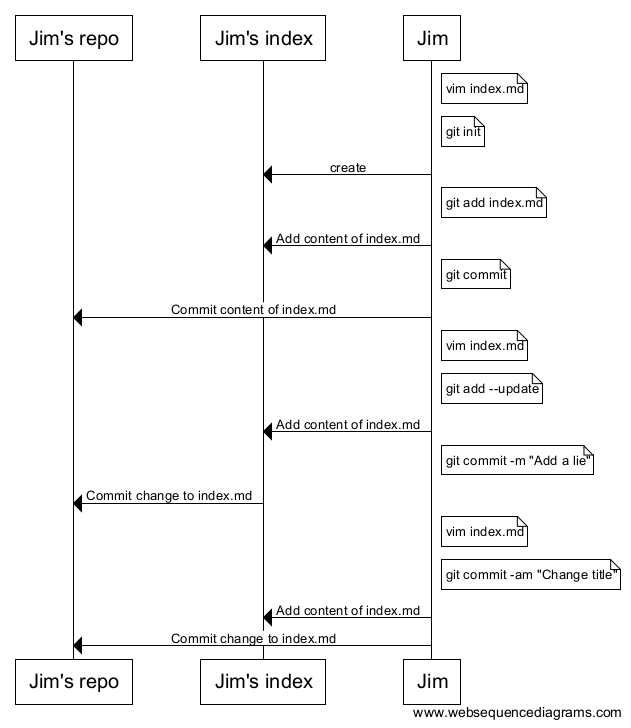

In [27]:
message="""
participant "Jim's repo" as R
participant "Jim's index" as I
participant Jim as J

note right of J: vim index.md

note right of J: git init
J->I: create
J>R: create

note right of J: git add index.md

J->I: Add content of index.md

note right of J: git commit
J->R: Commit content of index.md

note right of J:  vim index.md

note right of J: git add --update
J->I: Add content of index.md
note right of J: git commit -m "Add a lie"
I->R: Commit change to index.md

note right of J:  vim index.md
note right of J: git commit -am "Change title"
J->I: Add content of index.md
J->R: Commit change to index.md

"""
wsd(message)